## Exercises

Do your work for this exercise in a file named explore.

Spam Data

Load the spam data set.

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

Is there any overlap in the bigrams for the spam data and the ham data?

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
import pandas as pd
import numpy as np
import re
import unicodedata
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
from env import user, password, host
from wordcloud import WordCloud

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [3]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

In [4]:
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [7]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [8]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [9]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [10]:
all_freq.head()

call    600
im      462
get     397
ur      384
go      304
dtype: int64

In [11]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [12]:
word_counts.sort_values('all', ascending=False)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
ur,240,144,384
go,273,31,304
...,...,...,...
edition,1,0,1
algorithm,1,0,1
textbook,1,0,1
3230,1,0,1


In [13]:
word_counts.sort_values(['ham','spam', 'all'], ascending=False)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


<AxesSubplot:>

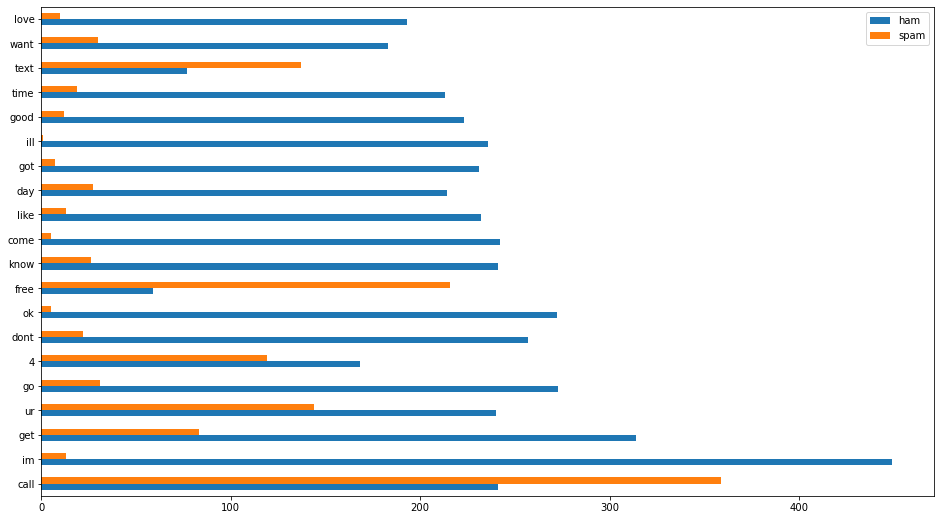

In [14]:
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh(figsize=[16,9])

In [15]:
word_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'], axis = 1)

,ham,spam,all
call,0.401667,0.598333,1.0
im,0.971861,0.028139,1.0
get,0.790932,0.209068,1.0
ur,0.625000,0.375000,1.0
go,0.898026,0.101974,1.0
4,0.585366,0.414634,1.0
dont,0.921147,0.078853,1.0
ok,0.981949,0.018051,1.0
free,0.214545,0.785455,1.0
know,0.902622,0.097378,1.0


Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

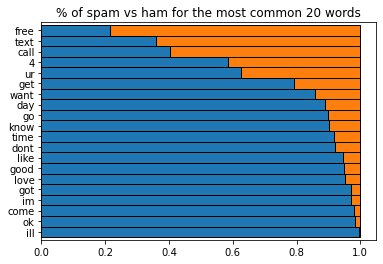

In [16]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=10)

(word_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'], axis = 1).drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of spam vs ham for the most common 20 words')

<AxesSubplot:>

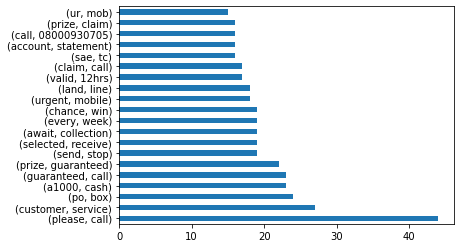

In [17]:
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(20).plot.barh()

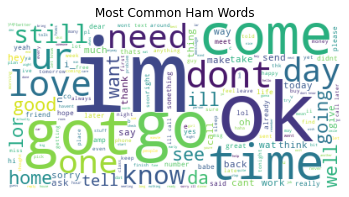

In [18]:
img = WordCloud(background_color='white'
               ).generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

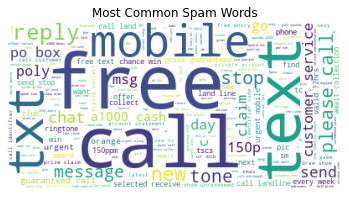

In [19]:
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

In [20]:
df['message_length'] = df['text'].str.len()

In [21]:
df['word_count'] = df.text.apply(clean).apply(len)

In [22]:
df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16
1,ham,Ok lar... Joking wif u oni...,29,5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22
3,ham,U dun say so early hor... U c already then say...,49,7
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8


In [23]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('He is really good')

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [24]:
df['sentiment'] = df['text'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16,0.6249
1,ham,Ok lar... Joking wif u oni...,29,5,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22,0.7964
3,ham,U dun say so early hor... U c already then say...,49,7,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8,-0.1027


In [25]:
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


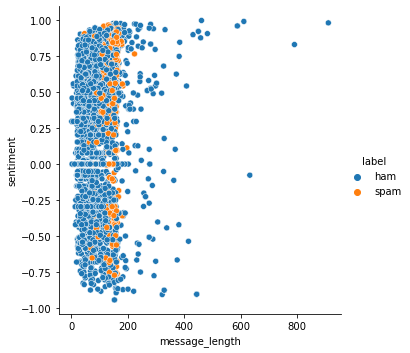

In [26]:
sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

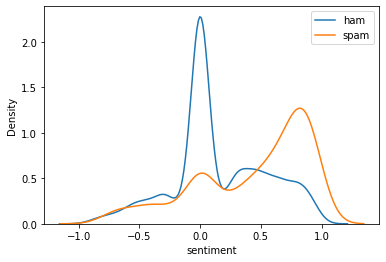

In [27]:
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
plt.legend(['ham', 'spam'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

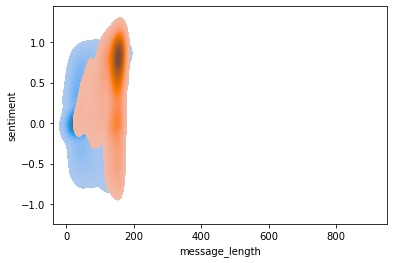

In [28]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(df[df.label == 'ham'].message_length, df[df.label == 'ham'].sentiment, levels = 30, shade = True);
sns.kdeplot(df[df.label == 'spam'].message_length, df[df.label == 'spam'].sentiment, levels = 30, shade = True);
sns.kdeplot(levels = 30, shade = True, alpha = 0.5)

In [29]:
codeup = pd.read_csv('codeup_blogs.csv', index_col=0)

In [30]:
codeup.head()

,title,content,clean,stemmed,lemmatized
0,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup excited launch first diversity equity i...,codeup excit launch first divers equiti inclus...,codeup excited launch first diversity equity i...
1,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup named 2022 diversity inclusion award wi...,codeup name 2022 divers inclus award winner sa...,codeup named 2022 diversity inclusion award wi...
2,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,deciding transition tech career big step signi...,decid transit tech career big step signific co...,deciding transition tech career big step signi...
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",codeup strongly values diversity inclusion hon...,codeup strongli valu divers inclus honor ameri...,codeup strongly value diversity inclusion hono...
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...,many companies switching cloud services implem...,mani compani switch cloud servic implement clo...,many company switching cloud service implement...


In [31]:
codeup['sentiment'] = codeup['lemmatized'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
codeup.head()

,title,content,clean,stemmed,lemmatized,sentiment
0,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup excited launch first diversity equity i...,codeup excit launch first divers equiti inclus...,codeup excited launch first diversity equity i...,0.9848
1,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup named 2022 diversity inclusion award wi...,codeup name 2022 divers inclus award winner sa...,codeup named 2022 diversity inclusion award wi...,0.9432
2,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,deciding transition tech career big step signi...,decid transit tech career big step signific co...,deciding transition tech career big step signi...,0.9933
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",codeup strongly values diversity inclusion hon...,codeup strongli valu divers inclus honor ameri...,codeup strongly value diversity inclusion hono...,0.9731
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...,many companies switching cloud services implem...,mani compani switch cloud servic implement clo...,many company switching cloud service implement...,0.9907


In [32]:
codeup['message_length'] = codeup['lemmatized'].str.len()

In [33]:
codeup.head()

,title,content,clean,stemmed,lemmatized,sentiment,message_length
0,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup excited launch first diversity equity i...,codeup excit launch first divers equiti inclus...,codeup excited launch first diversity equity i...,0.9848,576
1,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup named 2022 diversity inclusion award wi...,codeup name 2022 divers inclus award winner sa...,codeup named 2022 diversity inclusion award wi...,0.9432,213
2,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,deciding transition tech career big step signi...,decid transit tech career big step signific co...,deciding transition tech career big step signi...,0.9933,1681
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",codeup strongly values diversity inclusion hon...,codeup strongli valu divers inclus honor ameri...,codeup strongly value diversity inclusion hono...,0.9731,1290
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...,many companies switching cloud services implem...,mani compani switch cloud servic implement clo...,many company switching cloud service implement...,0.9907,2084


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

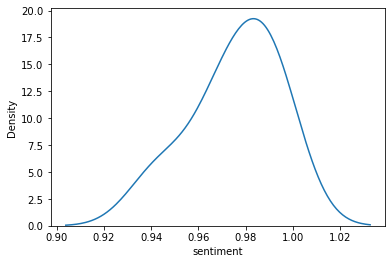

In [38]:
sns.kdeplot(codeup.sentiment)

In [61]:
news = pd.read_csv('news_shorts.csv')

In [62]:
news = pd.DataFrame(news, index=None).drop(columns='Unnamed: 0')

In [63]:
news.head()

,title,category,body,cleaned_body,lemmatized,stemmed
0,Kashmir's famous Dal Lake freezes,india,After the recent snowfall in upper reaches of ...,recent snowfall upper reaches kashmir himalaya...,recent snowfall upper reach kashmir himalayan ...,recent snowfal upper reach kashmir himalayan p...
1,"Indian Navy gets VLF, easy communication with ...",india,The Indian navy has a new communication system...,indian navy new communication system critical ...,indian navy new communication system critical ...,indian navi new commun system critic pass code...
2,Oldest woman in India passes away,india,"Kunjannam, a 112-yr-old woman from Parannur (K...",kunjannam 112yrold woman parannur kerala decla...,kunjannam 112yrold woman parannur kerala decla...,kunjannam 112yrold woman parannur kerala decla...
3,"Nigerian weightlifter in dope net, India may gain",india,India may move up after Nigerian weightlifter ...,india may move nigerian weightlifter chika ama...,india may move nigerian weightlifter chika ama...,india may move nigerian weightlift chika amala...
4,"Samsung launches Galaxy Star 2 Plus at Rs.7,335",india,Samsung has unveiled the Galaxy start 2 Plus s...,samsung unveiled galaxy start 2 plus smartphon...,samsung unveiled galaxy start 2 plus smartphon...,samsung unveil galaxi start 2 plu smartphon in...


In [64]:
news.category.value_counts()

business         25
sports           25
world            25
politics         25
technology       25
startup          25
entertainment    25
hatke            25
science          25
miscellaneous    24
automobile       24
india            12
Name: category, dtype: int64

In [66]:
business_words = clean(' '.join(news[news.category == 'business']['lemmatized']))
sports_words = clean(' '.join(news[news.category == 'sports']['lemmatized']))
politics_words = clean(' '.join(news[news.category == 'politics']['lemmatized']))
technology_words = clean(' '.join(news[news.category == 'technology']['lemmatized']))
all_words = clean(' '.join(news['lemmatized']))

In [67]:
business_freq = pd.Series(ham_words).value_counts()
sports_freq = pd.Series(spam_words).value_counts()
politics_freq = pd.Series(politics_words).value_counts()
tech_freq = pd.Series(technology_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [68]:
all_freq.head()

said       171
india       69
company     52
added       50
year        44
dtype: int64

In [69]:
word_counts = pd.concat([business_freq, sports_freq, politics_freq, tech_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['business','sports','politics','technology','all']
word_counts.head()

,business,sports,politics,technology,all
im,449,13,0,0,0
get,314,83,0,1,7
go,273,31,0,1,7
ok,272,5,0,0,0
dont,257,22,0,0,0


<AxesSubplot:>

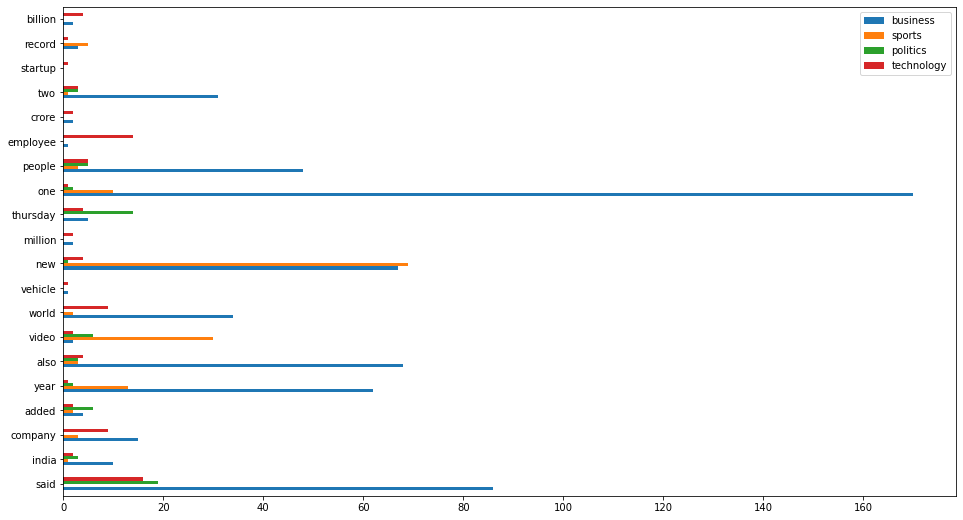

In [71]:
word_counts.sort_values('all', ascending=False
)[['business','sports','politics','technology']].head(20).plot.barh(figsize=[16,9])

<AxesSubplot:>

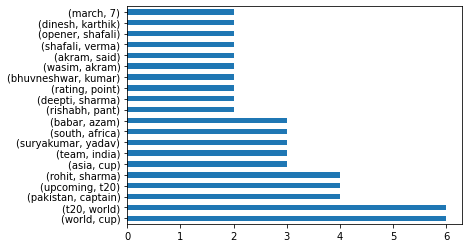

In [72]:
pd.Series(nltk.bigrams(sports_words)
         ).value_counts().head(20).plot.barh()

In [74]:
news['sentiment'] = news['lemmatized'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
news.head()

,title,category,body,cleaned_body,lemmatized,stemmed,sentiment
0,Kashmir's famous Dal Lake freezes,india,After the recent snowfall in upper reaches of ...,recent snowfall upper reaches kashmir himalaya...,recent snowfall upper reach kashmir himalayan ...,recent snowfal upper reach kashmir himalayan p...,-0.0772
1,"Indian Navy gets VLF, easy communication with ...",india,The Indian navy has a new communication system...,indian navy new communication system critical ...,indian navy new communication system critical ...,indian navi new commun system critic pass code...,0.1531
2,Oldest woman in India passes away,india,"Kunjannam, a 112-yr-old woman from Parannur (K...",kunjannam 112yrold woman parannur kerala decla...,kunjannam 112yrold woman parannur kerala decla...,kunjannam 112yrold woman parannur kerala decla...,0.4019
3,"Nigerian weightlifter in dope net, India may gain",india,India may move up after Nigerian weightlifter ...,india may move nigerian weightlifter chika ama...,india may move nigerian weightlifter chika ama...,india may move nigerian weightlift chika amala...,0.7717
4,"Samsung launches Galaxy Star 2 Plus at Rs.7,335",india,Samsung has unveiled the Galaxy start 2 Plus s...,samsung unveiled galaxy start 2 plus smartphon...,samsung unveiled galaxy start 2 plus smartphon...,samsung unveil galaxi start 2 plu smartphon in...,0.5859


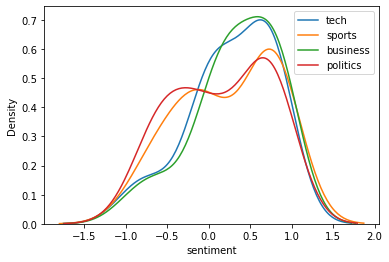

In [76]:
sns.kdeplot(news[news.category == 'technology'].sentiment, label = 'tech')
sns.kdeplot(news[news.category == 'sports'].sentiment, label = 'sports')
sns.kdeplot(news[news.category == 'business'].sentiment, label = 'business')
sns.kdeplot(news[news.category == 'politics'].sentiment, label = 'politics')
plt.legend(['tech', 'sports', 'business', 'politics'])